In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
print(len(x_train))
print(len(x_train[0]))
print(x_train[0].shape)

60000
28
(28, 28)


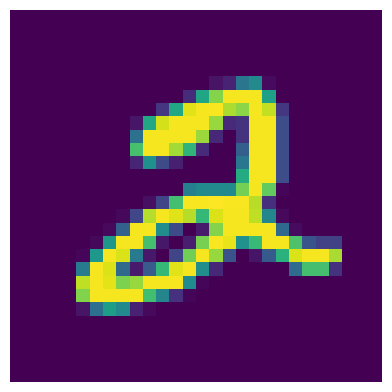

In [ ]:
plt.matshow(x_train[5])
plt.xlable(y_train[5])
plt.axis('off');

In [82]:
x_train=x_train/255
x_test=x_test/255

In [83]:
x_train_f=x_train.reshape(len(x_train),28*28)
x_test_f=x_test.reshape(len(x_test),28*28)
print(len(x_train_f[0]))
print(len(x_test_f[0]))
print(x_train_f[0].shape)

784
784
(784,)


In [93]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [85]:
nn=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
nn.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])
nn.fit(x_train_f,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4652 - accuracy: 0.8794
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2667 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2620 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2586 - accuracy: 0.9275
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2551 - accuracy: 0.9289
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2534 - accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.251

In [86]:
predict=nn.predict(x_train_f)

1875/1875 [==============================] - 2s 990us/step


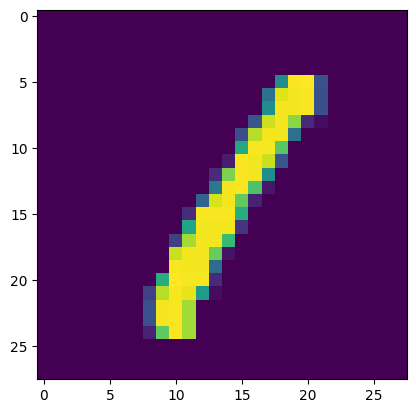

In [90]:
plt.imshow(x_train[3]);

In [91]:
predict[3]

array([6.2880083e-04, 9.9419343e-01, 7.5035238e-01, 1.4445817e-01,
       6.7744269e-03, 2.4067292e-02, 9.4238414e-05, 6.1805886e-03,
       7.0214832e-01, 1.5583837e-02], dtype=float32)

In [92]:
np.argmax(predict[3])

1